# Basic Analysis

- County Data Analysis

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Reading data using pandas from my computer
df = pd.read_csv('/Users/narayangill/Downloads/Data Analyst Portfolio Data/GDPbyCounty.csv')


In [7]:
# Checking Columns
df.columns

Index(['index', 'Year', 'County FIPS', 'Region', 'SUB_REGION', 'State',
       'STATE_ABBR', 'County', 'County Full Name', 'GDP (Chained $)'],
      dtype='object')

In [8]:
# Checking null values
df.isnull().sum()

index               0
Year                0
County FIPS         0
Region              0
SUB_REGION          0
State               0
STATE_ABBR          0
County              0
County Full Name    0
GDP (Chained $)     0
dtype: int64

In [12]:
# Count of distinct values in the county column
df["County"].nunique()

1801

In [13]:
# Checking count of unique values in the gdp column
df["GDP (Chained $)"].nunique()

54979

In [14]:
# Checking the mean, max, min
df['GDP (Chained $)'].mean()

5051671753.091085

In [24]:
# Checking which county has the highest GDP
df.loc[df['GDP (Chained $)'] == 710893266000]

,index,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
52358,52358,2018,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,710893266000


## GDP Column :

- The minimum value is 9,948,000
- The maximum value is 710,893,266,000
- The mean is ~ 5,051,671,753

## Creating a new dataframe for only 2018 data:

In [27]:
# Creating a new df
df_2018 = df.loc[df['Year']==2018]
# Sorting dataframe in decs order by GDP
df_2018 = df_2018.sort_values('GDP (Chained $)',ascending =False)

In [28]:
# Top 10 counties by highest GDP in 2018
top_10_2018 = df_2018.head(10)
top_10_2018

,index,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
52358,52358,2018,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,710893266000
52805,52805,2018,36061,Mideast,Middle Atlantic,New York,NY,New York,New York County,600244287000
44953,44953,2018,17031,Great Lakes,East North Central,Illinois,IL,Cook,Cook County,362063569000
54111,54111,2018,48201,Southwest,West South Central,Texas,TX,Harris,Harris County,361353488000
52382,52382,2018,6085,Far West,Pacific,California,CA,Santa Clara,Santa Clara County,316525538000
55372,55372,2018,53033,Far West,Pacific,Washington,WA,King,King County,277122158000
54067,54067,2018,48113,Southwest,West South Central,Texas,TX,Dallas,Dallas County,241375801000
52369,52369,2018,6059,Far West,Pacific,California,CA,Orange,Orange County,230145536000
52257,52257,2018,4013,Southwest,Mountain,Arizona,AZ,Maricopa,Maricopa County,220789933000
52376,52376,2018,6073,Far West,Pacific,California,CA,San Diego,San Diego County,219361505000


## Top 10 counties by GDP in 2018

In [37]:
# Removing unecessary columns for charting
top_10_2018 = top_10_2018.drop(columns=['index', 'Year','County FIPS','Region','SUB_REGION','State','County Full Name'])
top_10_2018

,STATE_ABBR,County,GDP (Chained $)
52358,CA,Los Angeles,710893266000
52805,NY,New York,600244287000
44953,IL,Cook,362063569000
54111,TX,Harris,361353488000
52382,CA,Santa Clara,316525538000
55372,WA,King,277122158000
54067,TX,Dallas,241375801000
52369,CA,Orange,230145536000
52257,AZ,Maricopa,220789933000
52376,CA,San Diego,219361505000


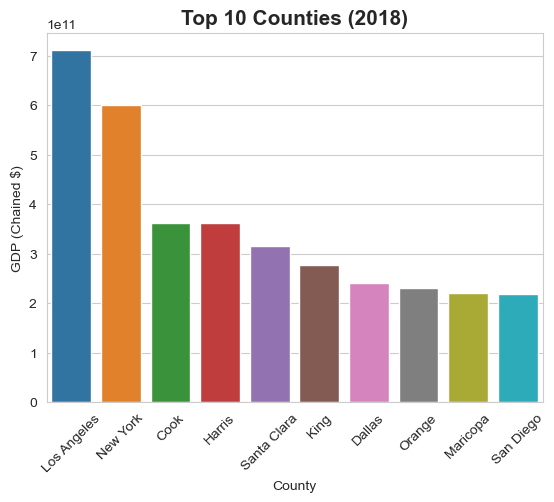

In [40]:
#Plotting top 10 counties (2018) according to GDP
#plt.xticks is to rotate x-axis so they are readable
sns.set_style('whitegrid')
sns.barplot(x = 'County', y = 'GDP (Chained $)', data = top_10_2018)
plt.title('Top 10 Counties (2018)',fontsize=15,fontweight='bold')
plt.xticks(rotation = 45);

- You can finish the corresponding (matplotlib) line with a semicolon; (removes extra text)

## Total counties listed per each state (2018)

In [42]:
# Count of each state in 2018 dataset
df_2018_state = df_2018['State'].value_counts()
df_2018_state

Texas                   254
Georgia                 159
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Virginia                 82
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Alabama                  67
Florida                  67
Pennsylvania             67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Alaska              

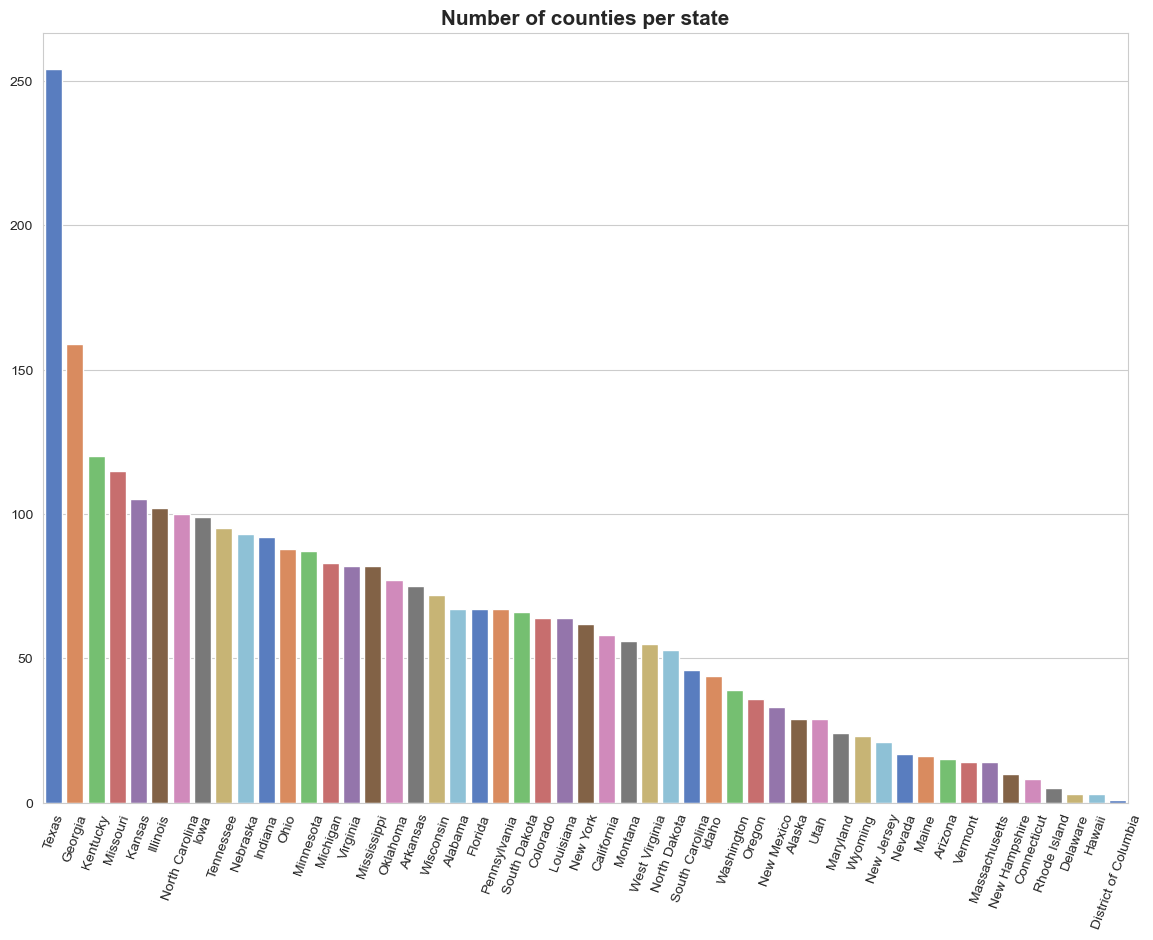

In [43]:
# Plotting count of states in 2018 df
# Changing the fig size to make the chart bigger
plt.figure(figsize=(14,10))
sns.set_style('whitegrid')
sns.barplot(x = df_2018_state.index, y = df_2018_state.values, palette = 'muted')
plt.title('Number of counties per state', fontsize=15, fontweight='bold')
plt.xticks(rotation = 70);

## New dataframe for top 100 counties (2018):

In [44]:
#Top 100 counties by highest GDP
top_100_2018 = df_2018.head(100)
# Removing unecessary columns
top_100_2018 = top_100_2018.drop(columns=['index', 'Year','County FIPS','Region','SUB_REGION','STATE_ABBR','County Full Name'])
top_100_2018

,State,County,GDP (Chained $)
52358,California,Los Angeles,710893266000
52805,New York,New York,600244287000
44953,Illinois,Cook,362063569000
54111,Texas,Harris,361353488000
52382,California,Santa Clara,316525538000
...,...,...,...
54592,Massachusetts,Worcester,40731879000
52260,Arizona,Pima,40011352000
55382,Washington,Pierce,39615989000
54737,Minnesota,Ramsey,39057292000


In [48]:
# Value counts of the states in top 100 by GDP in 2018
top_100_2018_state = top_100_2018['State'].value_counts()
top_100_2018_state

California              14
New York                 9
Florida                  7
Texas                    6
Massachusetts            5
New Jersey               5
Maryland                 5
Pennsylvania             4
Georgia                  3
Connecticut              3
Illinois                 3
Ohio                     3
Washington               3
Wisconsin                2
Oregon                   2
Tennessee                2
Oklahoma                 2
Colorado                 2
Arizona                  2
Missouri                 2
North Carolina           2
Michigan                 2
Minnesota                2
Utah                     1
Indiana                  1
Nevada                   1
Hawaii                   1
District of Columbia     1
Kentucky                 1
Kansas                   1
Delaware                 1
Alabama                  1
Nebraska                 1
Name: State, dtype: int64

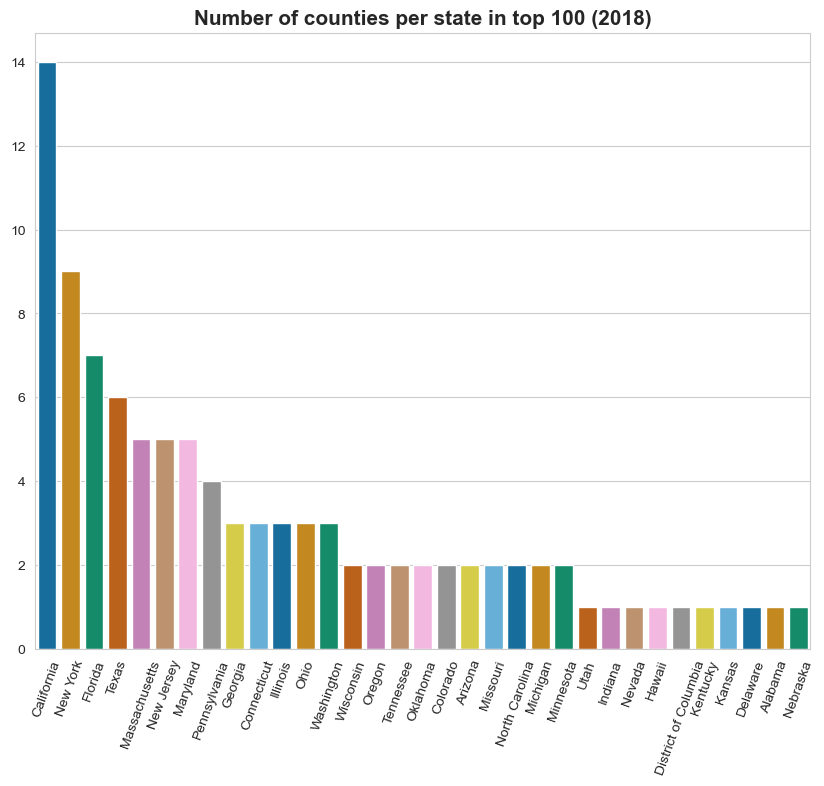

In [50]:
# Plotting count of states in top 100 by GDP in 2018
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
sns.barplot(x = top_100_2018_state.index, y = top_100_2018_state.values, palette = 'colorblind')
plt.title('Number of counties per state in top 100 (2018)', fontsize=15, fontweight='bold')
plt.xticks(rotation = 70);

## New dataframe for 2001 data only

In [54]:
# Creating a new df for only 2001 data
df_2001 = df.loc[df['Year']==2001]
# Sorting dataframes in desc order by GDP
df_2001 = df_2001.sort_values('GDP (Chained $)', ascending = False)


## Top 100 counties in 2001

In [52]:
# Top 100 counties by highest GDP in 2001
top_100_2001 = df_2001.head(100)
# Removing unecessary columns
top_100_2001 = top_100_2001.drop(columns=['index', 'Year','County FIPS','Region','SUB_REGION','STATE_ABBR','County Full Name'])
top_100_2001

,State,County,GDP (Chained $)
199,California,Los Angeles,476894105000
1986,New York,New York,467189021000
300,Illinois,Cook,324512658000
1359,Texas,Harris,249176199000
1315,Texas,Dallas,168978899000
...,...,...,...
4701,New Jersey,Monmouth,28330801000
26027,Rhode Island,Providence,28233720000
190,California,Fresno,28226117000
4512,Missouri,St. Louis,28042847000


In [55]:
# Value counts of the states in top 100 by GDP in 2001
top_100_2001_state = top_100_2001['State'].value_counts()
top_100_2001_state

California              13
New York                 9
New Jersey               7
Florida                  7
Texas                    5
Massachusetts            5
Maryland                 4
Georgia                  4
Michigan                 4
Pennsylvania             4
Connecticut              3
North Carolina           3
Missouri                 3
Ohio                     3
Illinois                 3
Oklahoma                 2
Minnesota                2
Arizona                  2
Colorado                 2
Tennessee                2
Alabama                  1
Delaware                 1
Nebraska                 1
Kentucky                 1
Hawaii                   1
Indiana                  1
Oregon                   1
Utah                     1
Wisconsin                1
Nevada                   1
District of Columbia     1
Washington               1
Rhode Island             1
Name: State, dtype: int64

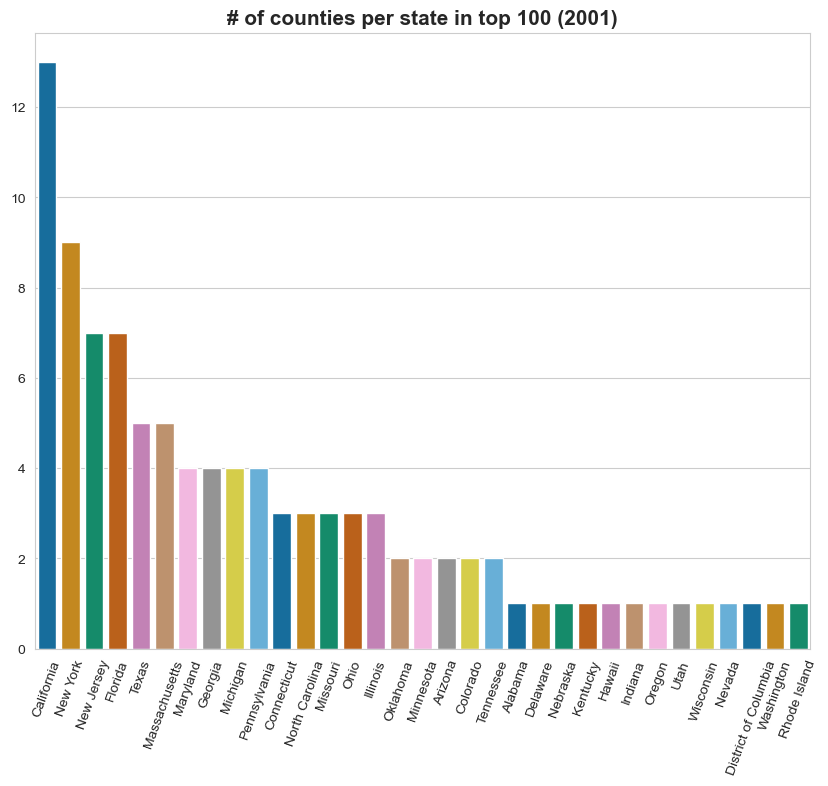

In [60]:
# Plotting count of states in top 100 by GDP in 2001
plt.figure(figsize = (10,8))
sns.set_style('whitegrid')
sns.barplot(x = top_100_2001_state.index, y = top_100_2001_state.values, palette = 'colorblind')
plt.title('# of counties per state in top 100 (2001)', fontsize=15, fontweight='bold')
plt.xticks(rotation = 70);


## Any difference in 2001 vs 2018?

In [61]:
# Find Values that exist in df1 but not in df2
differing_states = top_100_2018_state[~top_100_2018_state.index.isin(top_100_2001_state.index)]
differing_states

Kansas    1
Name: State, dtype: int64

- 1 county in Kansas made it to the top 100 list in 2018, which was not there in 2001

In [62]:
# Find values that exist in df2 but not in df1
differing_states_2 = top_100_2001_state[~top_100_2001_state.index.isin(top_100_2018_state.index)]
differing_states_2

Rhode Island    1
Name: State, dtype: int64

- 1 county in Rhode Island was included in the 2001 top 100 but not in the 2018 top 100 list

In [64]:
# What county from Kansas? 
top_100_2018.loc[top_100_2018['State']=='Kansas']

,State,County,GDP (Chained $)
53622,Kansas,Johnson,43264041000


In [65]:
# What county from Rhode Island?
top_100_2001.loc[top_100_2001['State']=='Rhode Island']

,State,County,GDP (Chained $)
26027,Rhode Island,Providence,28233720000


## Los Angeles County (#1 in the country)

In [66]:
# Los Angeles county GDP over 18 years
Los_Angeles = df.loc[df['County']== 'Los Angeles']
Los_Angeles


,index,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
199,199,2001,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,476894105000
2597,2597,2012,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,594533416000
5210,5210,2016,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,667706082000
12927,12927,2009,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,564543717000
14100,14100,2008,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,592301113000
14984,14984,2017,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,688661590000
18226,18226,2011,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,588098395000
19402,19402,2014,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,626602780000
24625,24625,2015,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,653885024000
26300,26300,2010,6037,Far West,Pacific,California,CA,Los Angeles,Los Angeles County,576055860000


In [67]:
# Removing unecessary columns
Los_Angeles = Los_Angeles.drop(columns=['index','County FIPS','Region','SUB_REGION','State','County Full Name'])
Los_Angeles

,Year,STATE_ABBR,County,GDP (Chained $)
199,2001,CA,Los Angeles,476894105000
2597,2012,CA,Los Angeles,594533416000
5210,2016,CA,Los Angeles,667706082000
12927,2009,CA,Los Angeles,564543717000
14100,2008,CA,Los Angeles,592301113000
14984,2017,CA,Los Angeles,688661590000
18226,2011,CA,Los Angeles,588098395000
19402,2014,CA,Los Angeles,626602780000
24625,2015,CA,Los Angeles,653885024000
26300,2010,CA,Los Angeles,576055860000


In [68]:
# Sorting dataframe in desc order by GDP
Los_Angeles = Los_Angeles.sort_values('GDP (Chained $)', ascending = False)


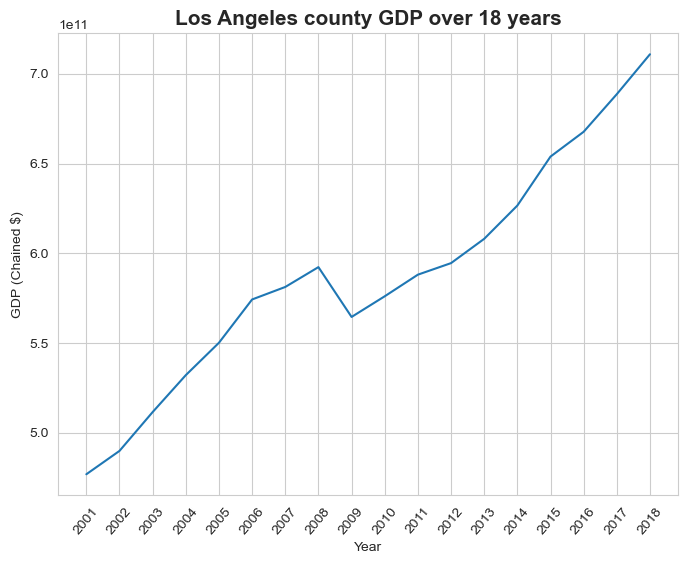

In [69]:
# Lineplot for Los Angeles county GDP over 18 years
# Plt ticks can se tthe number of x variables to list
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='GDP (Chained $)', data=Los_Angeles)
plt.xticks(range(2001, 2019, 1))
plt.title('Los Angeles county GDP over 18 years', fontsize=15, fontweight='bold')
plt.xticks(rotation = 50);

## New York county (#2 in GDP)

In [75]:
# New York county GDP over 18 years
New_York = df.loc[df['County']== 'New York']

In [76]:
# Removing unecessary columns
New_York = New_York.drop(columns=['index','County FIPS','Region','SUB_REGION','State','County Full Name'])

In [77]:
# Sorting dataframe in decs order by GDP
New_York = New_York.sort_values('GDP (Chained $)',ascending = False)

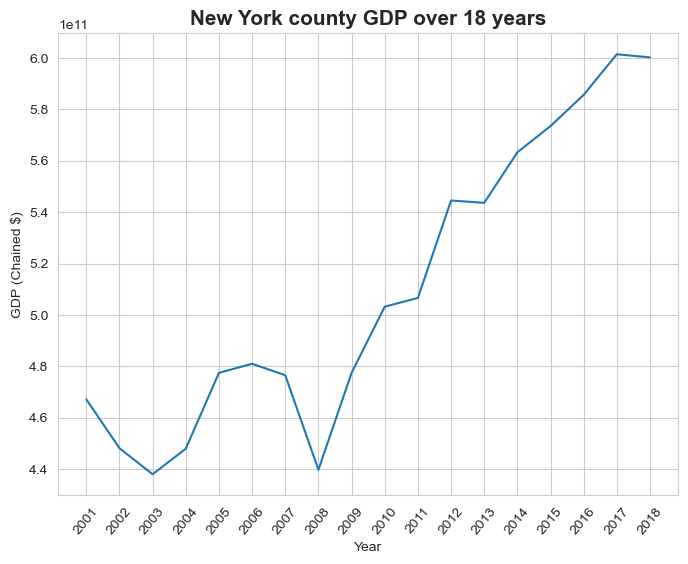

In [78]:
# Lineplot for New York county GDP over 18 years
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='GDP (Chained $)', data=New_York)
plt.xticks(range(2001, 2019, 1))
plt.title('New York county GDP over 18 years', fontsize=15, fontweight='bold')
plt.xticks(rotation = 50);

New York county had a lower GDP in 2008 or the first decade compared to LA county

## Cook county (IL) (#3 in GDP)

In [80]:
# Cook county GDP over 18 years
Cook = df.loc[df['County']== 'Cook']
Cook = df.loc[(df['County']== 'Cook') & (df['STATE_ABBR']== 'IL')]


In [81]:
# Removing unecessary columns
Cook = Cook.drop(columns=['index','County FIPS','Region','SUB_REGION','State','County Full Name'])

In [82]:
# Sorting dataframe in desc order by GDP
Cook = Cook.sort_values('GDP (Chained $)', ascending = False)
Cook

,Year,STATE_ABBR,County,GDP (Chained $)
44953,2018,IL,Cook,362063569000
17023,2017,IL,Cook,354454887000
6757,2016,IL,Cook,351380397000
20397,2015,IL,Cook,348451260000
23550,2014,IL,Cook,342176485000
39496,2007,IL,Cook,341013283000
46443,2006,IL,Cook,339391661000
36409,2013,IL,Cook,338427304000
40518,2005,IL,Cook,337394405000
3366,2012,IL,Cook,334992169000


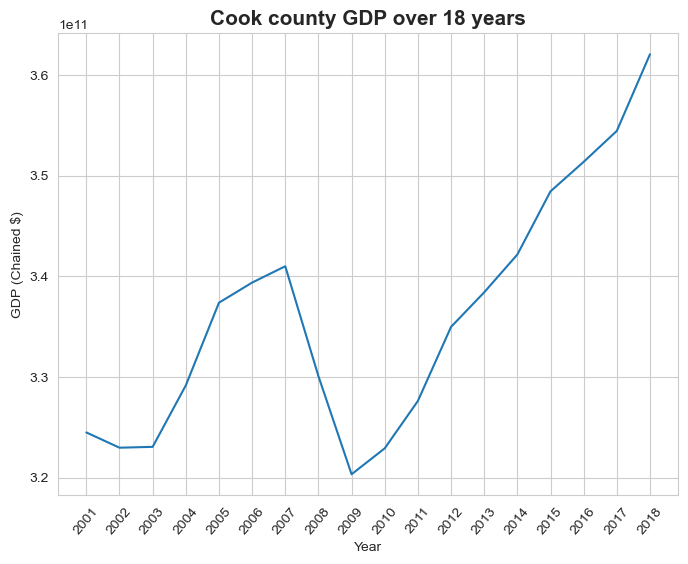

In [83]:
# Lineplot for Cook county GDP over 18 years
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='GDP (Chained $)', data=Cook)
plt.xticks(range(2001, 2019, 1))
plt.title('Cook county GDP over 18 years', fontsize=15, fontweight='bold')
plt.xticks(rotation = 50);